In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer

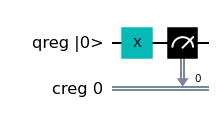

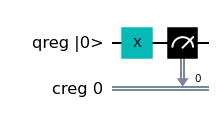

In [19]:
qr = QuantumRegister(1, "qreg")
cr = ClassicalRegister(1, "creg")


qc = QuantumCircuit(qr, cr)
qc.x(0)

qc.measure(qr[0], cr[0])

qc.draw(output='mpl', initial_state = True)

In [20]:
from qiskit import execute

In [25]:
job = execute(qc, Aer.get_backend("qasm_simulator"))

counts = job.result().get_counts(qc)

In [26]:
counts

{'1': 1024}

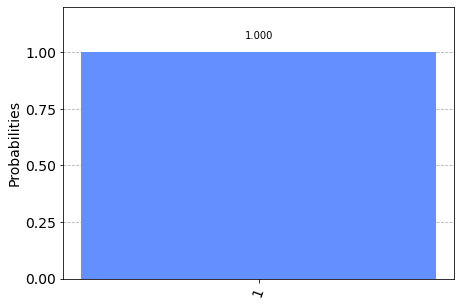

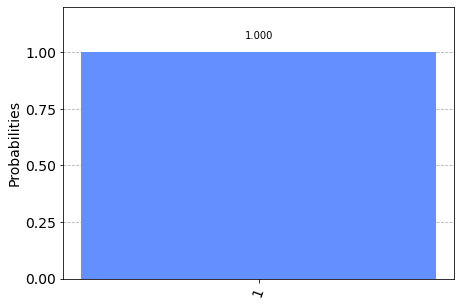

In [27]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [28]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qreg[1];
creg creg[1];
x qreg[0];
measure qreg[0] -> creg[0];



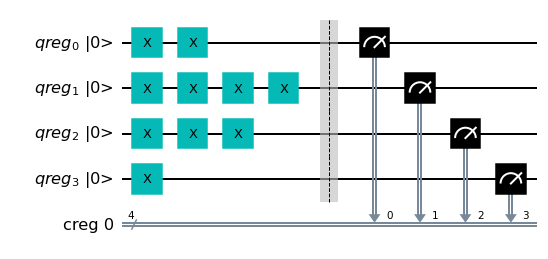

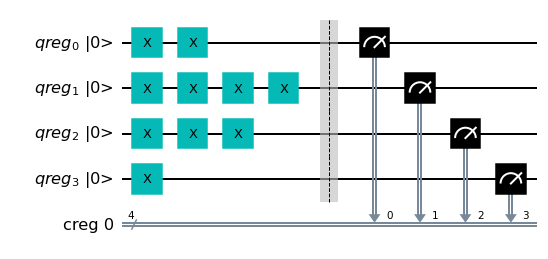

In [37]:
# define quantum and classical registers and then quantum circuit
q2 = QuantumRegister(4,"qreg")
c2 = ClassicalRegister(4,"creg")
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first quantum bit twice
qc2.x(q2[0])
qc2.x(q2[0])

# apply x-gate to the fourth quantum bit once
qc2.x(q2[3])

# apply x-gate to the third quantum bit three times
qc2.x(q2[2])
qc2.x(q2[2])
qc2.x(q2[2])

# apply x-gate to the second quantum bit four times
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])

# define a barrier (for a better visualization)
qc2.barrier()

# if the sizes of quantum and classical registers are the same, we can define measurements with a single line of code
qc2.measure(q2, c2)
# then quantum bits and classical bits are associated with respect to their indices

qc2.draw(output='mpl', initial_state=True)

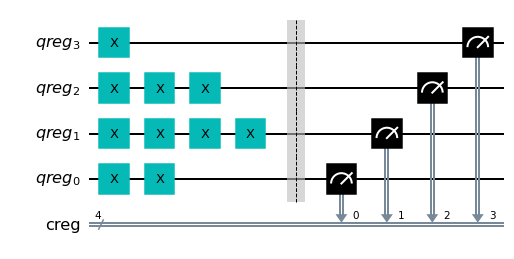

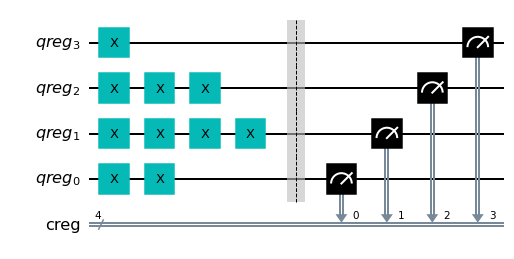

In [38]:
qc2.draw(output='mpl',reverse_bits=True)

In [69]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc2)
print(counts)

{'1100': 1000}


JobStatus.DONE
{'1100': 1000}


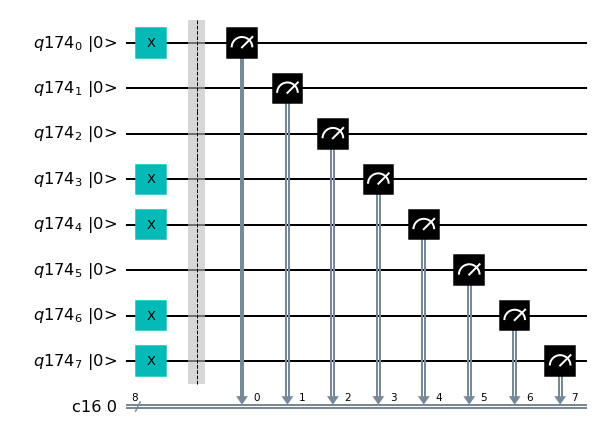

In [74]:
import numpy as np

q8 = QuantumRegister(8)
c8 = ClassicalRegister(8)

qc8 = QuantumCircuit(q8, c8)

for i in range(8):
    if np.random.rand() < 0.5:
        qc8.x(q8[i])
        
qc8.barrier()
qc8.measure(q8, c8)

qc8.draw(output='mpl', initial_state=1)

job8 = execute(qc8, Aer.get_backend('statevector_simulator'), shots = 10)
print(job.status())
counts = job.result().get_counts(qc2)
print(counts)

<font style="font-size:28px;" align="left"><b>Hadamard Operator</b></font>

{'1': 5062, '0': 4938}


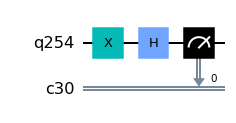

In [88]:
qh = QuantumRegister(1)
ch = ClassicalRegister(1)

qhc = QuantumCircuit(qh, ch)

qhc.x(qh[0])
qhc.h(qh[0])


qhc.measure(qh, ch)
qhc.draw(output='mpl')

job = execute(qhc, Aer.get_backend("qasm_simulator"), shots = 10000)

result = job.result()
print(result.get_counts())

{'1': 1024}


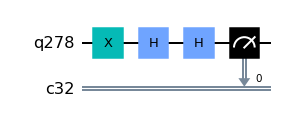

In [90]:
qh = QuantumRegister(1)
ch = ClassicalRegister(1)

qhc = QuantumCircuit(qh, ch)

qhc.x(qh[0])
qhc.h(qh[0])
qhc.h(qh[0])

qhc.measure(qh, ch)
qhc.draw(output='mpl')

job = execute(qhc, Aer.get_backend("qasm_simulator"))

result = job.result()
print(result.get_counts())